## Importing the Dependencies

In [1]:
import pandas as pd                                           # For creating the dataframe and dealing with rows and columns
import numpy as np                                            # For intialising array,list,tuple,dictonaries
import seaborn as sns                                         # For plotting and data visualizing
from sklearn.model_selection import train_test_split          # For splitting data into training and test data
from sklearn import svm                                       # For traning the model
from sklearn.metrics import accuracy_score                    # For evaluating the accuracy score of model

In [2]:
import warnings                                               # Used to remove unnecessary warnings
warnings.filterwarnings('ignore')

## Data Collection and Processing

In [3]:
# Loading the dataset to pandas Dataframe
loan_dataset = pd.read_csv('loantrain.csv')


In [4]:
# Printing the first 5 rows
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Number of rows and Columns in the dataframe
loan_dataset.shape

(614, 13)

In [6]:
# Stastical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Droping the missing values
loan_dataset = loan_dataset.dropna()

# Now printing
loan_dataset.isnull().sum()   # All incomplete data removed

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
loan_dataset.shape  #Rows Dropped 

(480, 13)

In [10]:
# Label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [11]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
# Dependent Column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [13]:
# Replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [14]:
# Dependent value 
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

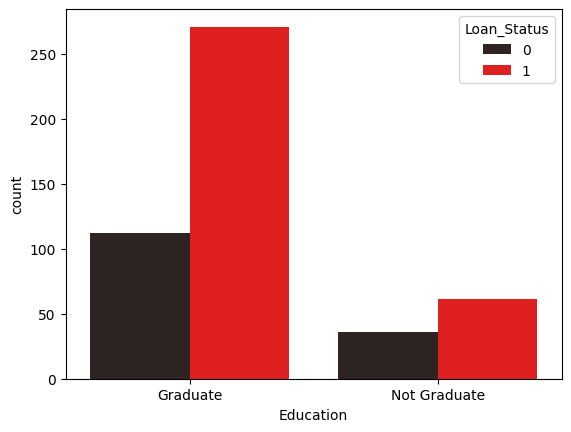

In [15]:
# Education and Loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset,color='r')

<Axes: xlabel='Married', ylabel='count'>

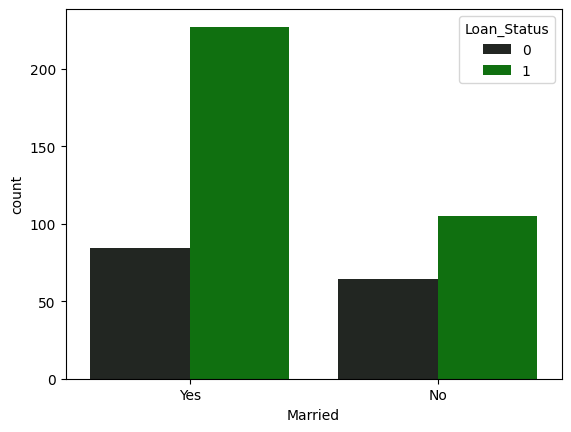

In [16]:
# Marital status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset,color='g')

<Axes: xlabel='Gender', ylabel='count'>

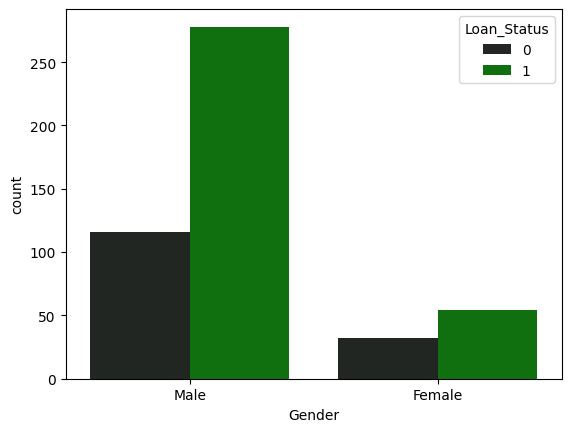

In [17]:
# Gender status and loan status
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset,color='g')

In [18]:
# Converting categorical columns to numerial values
loan_dataset.replace({'Married':{'No':0,'Yes':1},
                      'Gender':{'Male':1,'Female':0},
                      'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                      'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)

loan_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [19]:
# Seprating data and label
X = loan_dataset.drop(columns =['Loan_ID','Loan_Status'],axis=1)
y = loan_dataset['Loan_Status']
print(X,y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

## Train Test Split 

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


## Traning the model Using Support Vector machine Model

In [22]:
classifier = svm.SVC(kernel='linear')

In [23]:
# Traning the support Vector machine Model
classifier.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Model Evaluation

In [24]:
# Accuracy score on the traning data
X_train_prediction = classifier.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction,y_train)

In [25]:
print("Accuracy on traning data: ",traning_data_accuracy)

Accuracy on traning data:  0.7986111111111112


In [26]:
# Accuracy score on the testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)

In [27]:
print("Accuracy on testing data: ",test_data_accuracy)

Accuracy on testing data:  0.8333333333333334


## Making a predictive system
  
  -  ## Hardcode

In [28]:
input_data = (1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1)  # must match feature order-> take from the data set and convert in form of numbers then only you'll get output

# convert to numpy
input_data_as_numpy_array = np.asarray(input_data, dtype=float)

# reshape for 1 sample with 11 features
input_reshaping = input_data_as_numpy_array.reshape(1, -1)

# prediction
prediction = classifier.predict(input_reshaping)

if prediction[0] == 1:
    print("\u2705 Loan Approved")
else:
    print("\u274C Loan Not Approved")


❌ Loan Not Approved


## Making Predictive System 
  - ## User Input


In [29]:
# Ask user to enter values (must follow the same order as features in X)
# Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, 
# CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area

print("Enter the details below:")

Gender = int(input("Gender (1 = Male, 0 = Female): "))
Married = int(input("Married (1 = Yes, 0 = No): "))
Dependents = int(input("Dependents (0,1,2,4 for 3+): "))
Education = int(input("Education (1 = Graduate, 0 = Not Graduate): "))
Self_Employed = int(input("Self Employed (1 = Yes, 0 = No): "))
ApplicantIncome = float(input("Applicant Income: "))
CoapplicantIncome = float(input("Coapplicant Income: "))
LoanAmount = float(input("Loan Amount: "))
Loan_Amount_Term = float(input("Loan Amount Term: "))
Credit_History = float(input("Credit History (1.0 = Good, 0.0 = Bad): "))
Property_Area = int(input("Property Area (0 = Rural, 1 = Semiurban, 2 = Urban): "))

# Creating input array
input_data = (Gender, Married, Dependents, Education, Self_Employed,
              ApplicantIncome, CoapplicantIncome, LoanAmount, 
              Loan_Amount_Term, Credit_History, Property_Area)

# Convert to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape for prediction
input_reshaping = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = classifier.predict(input_reshaping)

# Show result
if prediction[0] == 1:
    print("\u2705 Loan Approved")
else:
    print("\u274C Loan Not Approved")


Enter the details below:
✅ Loan Approved
